In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [2]:
dfs = [pd.read_csv('user_' + user + '.csv') for user in ['b','c','d']]

for i in range(len(dfs)):
    dfs[i]['User'] = pd.Series(i, index=dfs[i].index)
    data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

data = data[data.columns.drop(list(data.filter(regex='User')))]
data

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,0.0,3575.001413,2067.069485,1.100858,2.434076,0.543417,2.021302,2.553511,2.365487,3568.869690,...,1.574662,2.039709,3573.533259,2064.975048,0.761069,2.073592,0.261481,1.063716,2.166494,1.885875
1,0.0,3573.472842,2065.800686,1.090318,3.227924,0.648712,2.059264,2.774706,3.411464,3575.626827,...,5.381351,9.331080,3580.290004,2079.580199,0.407036,4.721191,1.604364,2.884035,1.414675,2.954279
2,2.0,3574.983768,2065.875038,1.907066,3.382158,1.549094,2.302073,2.396191,3.876850,3576.225454,...,5.018896,6.201022,3585.648095,2078.434125,2.326482,3.208700,0.725349,1.448075,0.950014,2.020696
3,0.0,3572.080889,2062.954256,1.208711,2.185933,0.527516,1.383347,1.491573,2.038180,3563.766670,...,0.930895,1.798504,3569.509367,2062.287309,1.500673,2.816629,0.505014,1.382074,1.489048,2.270938
4,1.0,3573.534709,2065.113750,0.855827,1.172306,0.528934,0.849275,2.082744,2.229527,3568.692097,...,1.587021,1.663012,3573.903622,2064.162117,0.645148,1.849567,1.120343,1.371170,1.359754,1.902640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2.0,3569.816065,2064.256275,1.159745,2.601396,0.792874,1.398193,0.893148,1.757888,3562.795598,...,0.997500,2.229643,3567.598599,2061.716118,1.206217,2.178799,0.996849,2.414660,1.133285,1.904587
8636,1.0,3571.552090,2062.816733,0.848895,1.656839,0.829219,1.522172,1.348889,2.943499,3564.450695,...,1.180833,2.214043,3570.155457,2062.594641,2.122560,3.098691,0.796147,2.367273,1.458096,2.404202
8637,0.0,3571.804672,2064.692984,0.537253,2.528020,0.787340,1.793262,2.764398,3.844259,3572.500322,...,5.637226,13.131767,3586.494094,2079.889779,1.264305,3.406159,0.766959,4.300380,1.355594,2.885730
8638,0.0,3566.836591,2061.201192,0.382628,1.410153,0.620024,1.488091,2.036828,2.512457,3573.635671,...,1.662972,1.499659,3569.218561,2062.246786,0.756692,1.321790,0.173517,1.044779,1.327151,2.150542


In [4]:
# Checking null values in the dataset

data.isnull().sum()/len(data)*100

# There are no null values in the dataset, hence no columns are dropped

Class            0.0
AF3 delta std    0.0
AF3 delta m      0.0
AF3 theta std    0.0
AF3 theta m      0.0
                ... 
AF4 theta m      0.0
AF4 alpha std    0.0
AF4 alpha m      0.0
AF4 beta std     0.0
AF4 beta m       0.0
Length: 113, dtype: float64

In [5]:
# Using the high Corrleation filter

# Dropping the dependant variable
df=data.drop('Class',1)

#Identifying columns with high correlation
corr_matrix=df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
data_highcorr=data[col_to_drop]
data_lowcorr =data.drop(col_to_drop,1)

<ipython-input-5-b5aec26926f0>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=data.drop('Class',1)
<ipython-input-5-b5aec26926f0>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
<ipython-input-5-b5aec26926f0>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_lowcorr =data.drop(col_to_drop,1)


In [6]:
# Data with highest correlation
data_highcorr

,F3 alpha m,F3 beta m,T7 alpha m,T7 beta m,P7 delta m,P7 alpha m,P7 beta m,FC6 alpha m,FC6 beta m,F4 alpha m,F8 alpha m,F8 beta m
0,2.054523,2.413056,0.786481,1.564186,2063.389080,2.349325,2.428261,1.523890,2.285780,2.312657,1.116637,2.039709
1,14.868993,9.847675,10.846367,6.663395,2177.259993,12.087819,8.314366,5.212430,3.277959,12.194384,15.336685,9.331080
2,4.636927,5.193008,1.722414,2.215378,2124.849140,4.005574,5.458259,2.996675,2.582632,4.324778,2.887605,6.201022
3,2.144534,1.656297,1.275624,1.429820,2059.053768,1.596665,2.423110,2.361741,1.757628,3.036513,1.298909,1.798504
4,2.416985,1.959988,1.907207,1.910099,2061.349615,2.026752,2.286083,1.858335,2.342910,1.558778,0.922930,1.663012
...,...,...,...,...,...,...,...,...,...,...,...,...
8635,0.938246,1.632473,1.201821,0.839597,2059.737402,2.262786,1.834189,1.186091,1.660935,3.895762,1.860360,2.229643
8636,1.396298,1.675468,1.595106,1.490564,2063.282191,1.037591,1.868674,2.133020,2.097568,2.848726,2.253839,2.214043
8637,21.585865,11.868715,17.977528,10.002615,2263.493622,20.936153,12.779104,6.350194,2.813992,20.632762,22.108743,13.131767
8638,2.145143,2.981000,0.750583,2.363390,2061.816672,2.757865,2.252738,1.336140,2.555264,3.240360,1.164904,1.499659


In [7]:
# Data with low correlation
data_lowcorr

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 alpha std,F8 beta std,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,0.0,3575.001413,2067.069485,1.100858,2.434076,0.543417,2.021302,2.553511,2.365487,3568.869690,...,0.570258,1.574662,3573.533259,2064.975048,0.761069,2.073592,0.261481,1.063716,2.166494,1.885875
1,0.0,3573.472842,2065.800686,1.090318,3.227924,0.648712,2.059264,2.774706,3.411464,3575.626827,...,0.373421,5.381351,3580.290004,2079.580199,0.407036,4.721191,1.604364,2.884035,1.414675,2.954279
2,2.0,3574.983768,2065.875038,1.907066,3.382158,1.549094,2.302073,2.396191,3.876850,3576.225454,...,0.614359,5.018896,3585.648095,2078.434125,2.326482,3.208700,0.725349,1.448075,0.950014,2.020696
3,0.0,3572.080889,2062.954256,1.208711,2.185933,0.527516,1.383347,1.491573,2.038180,3563.766670,...,0.865707,0.930895,3569.509367,2062.287309,1.500673,2.816629,0.505014,1.382074,1.489048,2.270938
4,1.0,3573.534709,2065.113750,0.855827,1.172306,0.528934,0.849275,2.082744,2.229527,3568.692097,...,0.296980,1.587021,3573.903622,2064.162117,0.645148,1.849567,1.120343,1.371170,1.359754,1.902640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2.0,3569.816065,2064.256275,1.159745,2.601396,0.792874,1.398193,0.893148,1.757888,3562.795598,...,0.506711,0.997500,3567.598599,2061.716118,1.206217,2.178799,0.996849,2.414660,1.133285,1.904587
8636,1.0,3571.552090,2062.816733,0.848895,1.656839,0.829219,1.522172,1.348889,2.943499,3564.450695,...,1.303303,1.180833,3570.155457,2062.594641,2.122560,3.098691,0.796147,2.367273,1.458096,2.404202
8637,0.0,3571.804672,2064.692984,0.537253,2.528020,0.787340,1.793262,2.764398,3.844259,3572.500322,...,1.810342,5.637226,3586.494094,2079.889779,1.264305,3.406159,0.766959,4.300380,1.355594,2.885730
8638,0.0,3566.836591,2061.201192,0.382628,1.410153,0.620024,1.488091,2.036828,2.512457,3573.635671,...,0.569734,1.662972,3569.218561,2062.246786,0.756692,1.321790,0.173517,1.044779,1.327151,2.150542


In [8]:
# Columns that are dropped
col_to_drop

['F3 alpha m',
 'F3 beta m',
 'T7 alpha m',
 'T7 beta m',
 'P7 delta m',
 'P7 alpha m',
 'P7 beta m',
 'FC6 alpha m',
 'FC6 beta m',
 'F4 alpha m',
 'F8 alpha m',
 'F8 beta m']

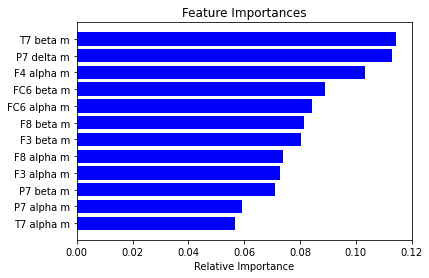

In [9]:
# Performing Feature selection using Random Forestmodel = RandomForestRegressor(random_state=1, max_depth=10)
model = RandomForestRegressor(random_state=1, max_depth=10)
data_highcorr=pd.get_dummies(data_highcorr)
model.fit(data_highcorr,data.Class)

# Plotting Feature Importance
features = data_highcorr.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-13:]  # top features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#mlxtend is installed to perform Backward Feature Elimination and its Implementation
!pip install mlxtend

In [19]:
data
y_data=data.iloc[:,0]
data_highcorr.insert(0,'Class',y_data)

In [50]:
data_highcorr

,Class,F3 alpha m,F3 beta m,T7 alpha m,T7 beta m,P7 delta m,P7 alpha m,P7 beta m,FC6 alpha m,FC6 beta m,F4 alpha m,F8 alpha m,F8 beta m
0,0.0,2.054523,2.413056,0.786481,1.564186,2063.389080,2.349325,2.428261,1.523890,2.285780,2.312657,1.116637,2.039709
1,0.0,14.868993,9.847675,10.846367,6.663395,2177.259993,12.087819,8.314366,5.212430,3.277959,12.194384,15.336685,9.331080
2,2.0,4.636927,5.193008,1.722414,2.215378,2124.849140,4.005574,5.458259,2.996675,2.582632,4.324778,2.887605,6.201022
3,0.0,2.144534,1.656297,1.275624,1.429820,2059.053768,1.596665,2.423110,2.361741,1.757628,3.036513,1.298909,1.798504
4,1.0,2.416985,1.959988,1.907207,1.910099,2061.349615,2.026752,2.286083,1.858335,2.342910,1.558778,0.922930,1.663012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2.0,0.938246,1.632473,1.201821,0.839597,2059.737402,2.262786,1.834189,1.186091,1.660935,3.895762,1.860360,2.229643
8636,1.0,1.396298,1.675468,1.595106,1.490564,2063.282191,1.037591,1.868674,2.133020,2.097568,2.848726,2.253839,2.214043
8637,0.0,21.585865,11.868715,17.977528,10.002615,2263.493622,20.936153,12.779104,6.350194,2.813992,20.632762,22.108743,13.131767
8638,0.0,2.145143,2.981000,0.750583,2.363390,2061.816672,2.757865,2.252738,1.336140,2.555264,3.240360,1.164904,1.499659


In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [52]:
# Splitting the dataset into X and y (Independant and Dependant features)
X=data_highcorr.iloc[:,1:]
y=data_highcorr.iloc[:,0]
y

0       0.0
1       0.0
2       2.0
3       0.0
4       1.0
       ... 
8635    2.0
8636    1.0
8637    0.0
8638    0.0
8639    2.0
Name: Class, Length: 8640, dtype: float64

In [53]:
# Training the LinearRegression model until 5 features remain
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=5, forward=False, verbose=1, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished
Features: 11/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished
Features: 10/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
Features: 9/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished
Features: 8/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
Features: 7/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 6/5[Parallel(n_jo

In [54]:
# Reducing the dataset with features of highest correlation
feat_names = list(sfs1.k_feature_names_)
print(feat_names)
newdata_highcorr=data[feat_names]
newdata_highcorr.insert(0,'Class', y)
newdata_highcorr

['F3 alpha m', 'P7 beta m', 'FC6 beta m', 'F4 alpha m', 'F8 beta m']


,Class,F3 alpha m,P7 beta m,FC6 beta m,F4 alpha m,F8 beta m
0,0.0,2.054523,2.428261,2.285780,2.312657,2.039709
1,0.0,14.868993,8.314366,3.277959,12.194384,9.331080
2,2.0,4.636927,5.458259,2.582632,4.324778,6.201022
3,0.0,2.144534,2.423110,1.757628,3.036513,1.798504
4,1.0,2.416985,2.286083,2.342910,1.558778,1.663012
...,...,...,...,...,...,...
8635,2.0,0.938246,1.834189,1.660935,3.895762,2.229643
8636,1.0,1.396298,1.868674,2.097568,2.848726,2.214043
8637,0.0,21.585865,12.779104,2.813992,20.632762,13.131767
8638,0.0,2.145143,2.252738,2.555264,3.240360,1.499659


In [57]:
# Model training

X=newdata_highcorr.iloc[:,1:]
y=newdata_highcorr.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

def build_model(num_classes=3):
    
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
    x = tf.keras.layers.Dense(128, activation='relu')(inputs)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [58]:
class_model = build_model(num_classes=3)

class_history = class_model.fit(
    X_train,
    y_train,
    validation_split=0.3,
    batch_size=32,
    epochs=25,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/25
133/133 [==============================] - 1s 4ms/step - loss: 1.1036 - accuracy: 0.3822 - val_loss: 1.0967 - val_accuracy: 0.3835
Epoch 2/25
133/133 [==============================] - 1s 7ms/step - loss: 1.0900 - accuracy: 0.3837 - val_loss: 1.1064 - val_accuracy: 0.3620
Epoch 3/25
133/133 [==============================] - 0s 4ms/step - loss: 1.0899 - accuracy: 0.3978 - val_loss: 1.1079 - val_accuracy: 0.3895
Epoch 4/25
133/133 [==============================] - 0s 2ms/step - loss: 1.0727 - accuracy: 0.4037 - val_loss: 1.0824 - val_accuracy: 0.3730
Epoch 5/25
133/133 [==============================] - 0s 2ms/step - loss: 1.0714 - accuracy: 0.4052 - val_loss: 1.0829 - val_accuracy: 0.3967
Epoch 6/25
133/133 [==============================] - 1s 4ms/step - loss: 1.0671 - accuracy: 0.4137 - val_loss: 1.0718 - val_accuracy: 0.3780
Epoch 7/25
133/133 [==============================] - 1s 5ms/step - loss: 1.0617 - accuracy: 0.4165 - val_loss: 1.1063 - val_accuracy: 0.3840
Epoch 

In [59]:
class_acc = class_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy (Class Model): {:.2f}%".format(class_acc * 100))

Test Accuracy (Class Model): 41.17%
